In [1]:
#
# Project 2, starter code Part a
#

import os
import pickle

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import layers
from tensorflow.python.client import device_lib
from tensorflow.keras import models
from skimage import color

In [2]:
# This is required when using GPU
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
            print(gpus)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        devices = device_lib.list_local_devices()
        avail_gpu = [x for x in devices if x.device_type == 'GPU']
        print('\n',avail_gpu)
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)
else:
    print("No gpus available")

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
1 Physical GPUs, 1 Logical GPUs

 [name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 3048682292
locality {
  bus_id: 1
  links {
  }
}
incarnation: 2134594655154387937
physical_device_desc: "device: 0, name: GeForce GTX 1650, pci bus id: 0000:01:00.0, compute capability: 7.5"
]


In [3]:
# Fixed, no need change
def load_data(file):
    file = 'data\\'+file
    with open(file, 'rb') as fo:
        try:
            samples = pickle.load(fo)
        except UnicodeDecodeError:  # python 3.x
            fo.seek(0)
            samples = pickle.load(fo, encoding='latin1')

    data, labels = samples['data'], samples['labels']

    data = np.array(data, dtype=np.float32) / 255
    data = tf.reshape(data, [-1,3, 32, 32])
    data = tf.transpose(data,(0,2,3,1))
    labels = np.array(labels, dtype=np.int32)
    return data, labels

In [4]:
class History_trained_model(object):
    def __init__(self, history, epoch, params):
        self.history = history
        self.epoch = epoch
        self.params = params

In [5]:
def make_model(num_ch_c1, num_ch_c2, use_dropout):
    ''' Note: This model is incomplete. You need to add suitable layers.
    '''

    model = tf.keras.Sequential()
    model.add(layers.Input(shape=(32,32,3)))
    model.add(layers.Conv2D(num_ch_c1, 9, padding='valid', activation='relu', input_shape=(None, None, 3)))
    model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
    model.add(layers.Conv2D(num_ch_c2, 5, padding='valid', activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))
    model.add(layers.Flatten())
    model.add(layers.Dense(300, activation=None))
    model.add(layers.Dense(10, use_bias=True, activation='softmax', input_shape=(300,)))  # Here no softmax because we have combined it with the loss
    return model
#model = make_model(50,60,False)
#model.summary()

In [6]:
def save_model(num_ch_c1,num_ch_c2,optimizer_,use_dropout):
    # Create folder to store models and results
    if not os.path.exists('./models'):
        os.mkdir('./models')
    if not os.path.exists('./results'):
        os.mkdir('./results')
     
    # Save model
    if use_dropout:
        model.save(f'./models/QuestionA2_{num_ch_c1}_{num_ch_c2}_{optimizer_}_dropout')
        with open(f'histories/{num_ch_c1}_{num_ch_c2}_{optimizer_}_dropout', 'wb') as file_pi:
            pickle.dump(history.history, file_pi)
    else:
        model.save(f'./models/QuestionA2_{num_ch_c1}_{num_ch_c2}_{optimizer_}_no_dropout')
        with open(f'histories/{num_ch_c1}_{num_ch_c2}_{optimizer_}_nodropout', 'wb') as file_pi:
            pickle.dump(history.history, file_pi)

In [7]:
def create_opt(optimizer_,lr):
    if optimizer_ == 'SGD':
        optimizer = keras.optimizers.SGD(learning_rate=lr)
    elif optimizer_ == 'SGD-momentum':  # Question 3(a)
        optimizer = keras.optimizers.SGD(learning_rate=lr, momentum = 0.1)
    elif optimizer_ == 'RMSProp':  # Question 3(b)
        optimizer = keras.optimizers.RMSprop(learning_rate=lr)
    elif optimizer_ == 'Adam':  # Question 3(c)
        optimizer = keras.optimizers.Adam(learning_rate=lr)
    else:
        raise NotImplementedError(f'You do not need to handle [{optimizer_}] in this project.')
    return optimizer

In [8]:
# Save the plot for losses
def plot_loss(loss,test_loss,use_dropout):
    train_loss = loss
    val_loss = test_loss
    plt.figure(figsize=(10,6))
    plt.plot(range(1, len(train_loss) + 1), train_loss, label='Train')
    plt.plot(range(1, len(val_loss) + 1), val_loss, label='Test')
    plt.title('Model Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend()
    if use_dropout:
        plt.savefig(
            f'./results/QuestionA3_{num_ch_c1}_{num_ch_c2}_{optimizer_}_dropout_loss.pdf')
    else:
        plt.savefig(
            f'./results/QuestionA3_{num_ch_c1}_{num_ch_c2}_{optimizer_}_no_dropout_loss.pdf'
        )
    plt.show()
    plt.close()

In [9]:
# Save the plot for accuracy
def plot_acc(acc,val_acc,use_dropout):
    train_acc = acc
    test_acc = val_acc
    plt.figure(figsize=(10,8))
    plt.plot(range(1, len(train_acc) + 1), train_acc, label='Train')
    plt.plot(range(1, len(test_acc) + 1), test_acc, label='Test')
    plt.title('Model Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend()
    if use_dropout:
        plt.savefig(
            f'./results/QuestionA2_{num_ch_c1}_{num_ch_c2}_{optimizer_}_dropout_accuracy.pdf'
        )
    else:
        plt.savefig(
            f'./results/QuestionA2_{num_ch_c1}_{num_ch_c2}_{optimizer_}_no_dropout_accuracy.pdf'
        )
    plt.show()
    plt.close()

Epoch 1/500
79/79 [==============================] - 5s 33ms/step - loss: 2.3092 - accuracy: 0.1031 - val_loss: 2.2963 - val_accuracy: 0.1460
Epoch 2/500
79/79 [==============================] - 1s 11ms/step - loss: 2.2953 - accuracy: 0.1541 - val_loss: 2.2891 - val_accuracy: 0.1640
Epoch 3/500
79/79 [==============================] - 1s 11ms/step - loss: 2.2878 - accuracy: 0.1660 - val_loss: 2.2819 - val_accuracy: 0.1610
Epoch 4/500
79/79 [==============================] - 1s 11ms/step - loss: 2.2797 - accuracy: 0.1668 - val_loss: 2.2748 - val_accuracy: 0.1670
Epoch 5/500
79/79 [==============================] - 1s 11ms/step - loss: 2.2727 - accuracy: 0.1705 - val_loss: 2.2668 - val_accuracy: 0.1725
Epoch 6/500
79/79 [==============================] - 1s 11ms/step - loss: 2.2648 - accuracy: 0.1828 - val_loss: 2.2580 - val_accuracy: 0.1815
Epoch 7/500
79/79 [==============================] - 1s 11ms/step - loss: 2.2550 - accuracy: 0.1941 - val_loss: 2.2479 - val_accuracy: 0.1920
Epoch 

79/79 [==============================] - 1s 11ms/step - loss: 1.7922 - accuracy: 0.3676 - val_loss: 1.8051 - val_accuracy: 0.3610
Epoch 59/500
79/79 [==============================] - 1s 11ms/step - loss: 1.7751 - accuracy: 0.3781 - val_loss: 1.8041 - val_accuracy: 0.3545
Epoch 60/500
79/79 [==============================] - 1s 11ms/step - loss: 1.7934 - accuracy: 0.3608 - val_loss: 1.7943 - val_accuracy: 0.3660
Epoch 61/500
79/79 [==============================] - 1s 11ms/step - loss: 1.7717 - accuracy: 0.3835 - val_loss: 1.7903 - val_accuracy: 0.3635
Epoch 62/500
79/79 [==============================] - 1s 11ms/step - loss: 1.7605 - accuracy: 0.3728 - val_loss: 1.7888 - val_accuracy: 0.3685
Epoch 63/500
79/79 [==============================] - 1s 11ms/step - loss: 1.7708 - accuracy: 0.3838 - val_loss: 1.7937 - val_accuracy: 0.3540
Epoch 64/500
79/79 [==============================] - 1s 11ms/step - loss: 1.7698 - accuracy: 0.3783 - val_loss: 1.8245 - val_accuracy: 0.3425
Epoch 65/500

79/79 [==============================] - 1s 11ms/step - loss: 1.5659 - accuracy: 0.4396 - val_loss: 1.6206 - val_accuracy: 0.4170
Epoch 116/500
79/79 [==============================] - 1s 11ms/step - loss: 1.5614 - accuracy: 0.4437 - val_loss: 1.6155 - val_accuracy: 0.4280
Epoch 117/500
79/79 [==============================] - 1s 11ms/step - loss: 1.5695 - accuracy: 0.4359 - val_loss: 1.6044 - val_accuracy: 0.4320
Epoch 118/500
79/79 [==============================] - 1s 11ms/step - loss: 1.5685 - accuracy: 0.4371 - val_loss: 1.5978 - val_accuracy: 0.4275
Epoch 119/500
79/79 [==============================] - 1s 11ms/step - loss: 1.5651 - accuracy: 0.4421 - val_loss: 1.5928 - val_accuracy: 0.4340
Epoch 120/500
79/79 [==============================] - 1s 11ms/step - loss: 1.5486 - accuracy: 0.4501 - val_loss: 1.6480 - val_accuracy: 0.3990
Epoch 121/500
79/79 [==============================] - 1s 11ms/step - loss: 1.5586 - accuracy: 0.4453 - val_loss: 1.5989 - val_accuracy: 0.4210
Epoch 

Epoch 172/500
79/79 [==============================] - 1s 11ms/step - loss: 1.4353 - accuracy: 0.4866 - val_loss: 1.4923 - val_accuracy: 0.4655
Epoch 173/500
79/79 [==============================] - 1s 11ms/step - loss: 1.4416 - accuracy: 0.4861 - val_loss: 1.5044 - val_accuracy: 0.4625
Epoch 174/500
79/79 [==============================] - 1s 11ms/step - loss: 1.4245 - accuracy: 0.4867 - val_loss: 1.5056 - val_accuracy: 0.4620
Epoch 175/500
79/79 [==============================] - 1s 11ms/step - loss: 1.4287 - accuracy: 0.4868 - val_loss: 1.4907 - val_accuracy: 0.4610
Epoch 176/500
79/79 [==============================] - 1s 11ms/step - loss: 1.4307 - accuracy: 0.4949 - val_loss: 1.4824 - val_accuracy: 0.4620
Epoch 177/500
79/79 [==============================] - 1s 11ms/step - loss: 1.4198 - accuracy: 0.4924 - val_loss: 1.5400 - val_accuracy: 0.4380
Epoch 178/500
79/79 [==============================] - 1s 11ms/step - loss: 1.3941 - accuracy: 0.5020 - val_loss: 1.5263 - val_accuracy:

Epoch 229/500
79/79 [==============================] - 1s 11ms/step - loss: 1.3602 - accuracy: 0.5257 - val_loss: 1.6205 - val_accuracy: 0.4505
Epoch 230/500
79/79 [==============================] - 1s 11ms/step - loss: 1.3368 - accuracy: 0.5324 - val_loss: 1.4858 - val_accuracy: 0.4780
Epoch 231/500
79/79 [==============================] - 1s 11ms/step - loss: 1.3361 - accuracy: 0.5368 - val_loss: 1.4770 - val_accuracy: 0.4645
Epoch 232/500
79/79 [==============================] - 1s 11ms/step - loss: 1.3210 - accuracy: 0.5406 - val_loss: 1.5419 - val_accuracy: 0.4370
Epoch 233/500
79/79 [==============================] - 1s 11ms/step - loss: 1.3416 - accuracy: 0.5270 - val_loss: 1.4958 - val_accuracy: 0.4620
Epoch 234/500
79/79 [==============================] - 1s 11ms/step - loss: 1.3326 - accuracy: 0.5293 - val_loss: 1.4922 - val_accuracy: 0.4840
Epoch 235/500
79/79 [==============================] - 1s 11ms/step - loss: 1.3368 - accuracy: 0.5275 - val_loss: 1.5610 - val_accuracy:

Epoch 286/500
79/79 [==============================] - 1s 11ms/step - loss: 1.2962 - accuracy: 0.5412 - val_loss: 1.3900 - val_accuracy: 0.5000
Epoch 287/500
79/79 [==============================] - 1s 11ms/step - loss: 1.2547 - accuracy: 0.5618 - val_loss: 1.4213 - val_accuracy: 0.4990
Epoch 288/500
79/79 [==============================] - 1s 11ms/step - loss: 1.2602 - accuracy: 0.5609 - val_loss: 1.3926 - val_accuracy: 0.4980
Epoch 289/500
79/79 [==============================] - 1s 11ms/step - loss: 1.2525 - accuracy: 0.5602 - val_loss: 1.3933 - val_accuracy: 0.5085
Epoch 290/500
79/79 [==============================] - 1s 11ms/step - loss: 1.2545 - accuracy: 0.5524 - val_loss: 1.3666 - val_accuracy: 0.5155
Epoch 291/500
79/79 [==============================] - 1s 11ms/step - loss: 1.2630 - accuracy: 0.5539 - val_loss: 1.4951 - val_accuracy: 0.4670
Epoch 292/500
79/79 [==============================] - 1s 11ms/step - loss: 1.2579 - accuracy: 0.5636 - val_loss: 1.3738 - val_accuracy:

Epoch 343/500
79/79 [==============================] - 1s 11ms/step - loss: 1.1951 - accuracy: 0.5759 - val_loss: 1.4474 - val_accuracy: 0.4905
Epoch 344/500
79/79 [==============================] - 1s 11ms/step - loss: 1.1804 - accuracy: 0.5888 - val_loss: 1.7393 - val_accuracy: 0.4080
Epoch 345/500
79/79 [==============================] - 1s 11ms/step - loss: 1.1939 - accuracy: 0.5840 - val_loss: 1.3183 - val_accuracy: 0.5335
Epoch 346/500
79/79 [==============================] - 1s 11ms/step - loss: 1.1813 - accuracy: 0.5862 - val_loss: 1.3420 - val_accuracy: 0.5275
Epoch 347/500
79/79 [==============================] - 1s 11ms/step - loss: 1.1710 - accuracy: 0.5883 - val_loss: 1.3423 - val_accuracy: 0.5240
Epoch 348/500
79/79 [==============================] - 1s 11ms/step - loss: 1.1602 - accuracy: 0.5988 - val_loss: 1.4489 - val_accuracy: 0.4900
Epoch 349/500
79/79 [==============================] - 1s 11ms/step - loss: 1.1970 - accuracy: 0.5789 - val_loss: 1.5566 - val_accuracy:

Epoch 400/500
79/79 [==============================] - 1s 11ms/step - loss: 1.1215 - accuracy: 0.6066 - val_loss: 1.3000 - val_accuracy: 0.5395
Epoch 401/500
79/79 [==============================] - 1s 11ms/step - loss: 1.1108 - accuracy: 0.6120 - val_loss: 1.7369 - val_accuracy: 0.3905
Epoch 402/500
79/79 [==============================] - 1s 11ms/step - loss: 1.1433 - accuracy: 0.5960 - val_loss: 1.3256 - val_accuracy: 0.5385
Epoch 403/500
79/79 [==============================] - 1s 11ms/step - loss: 1.1314 - accuracy: 0.6036 - val_loss: 1.3727 - val_accuracy: 0.5165
Epoch 404/500
79/79 [==============================] - 1s 11ms/step - loss: 1.1290 - accuracy: 0.6043 - val_loss: 1.4255 - val_accuracy: 0.5175
Epoch 405/500
79/79 [==============================] - 1s 11ms/step - loss: 1.1198 - accuracy: 0.6151 - val_loss: 1.2819 - val_accuracy: 0.5560
Epoch 406/500
79/79 [==============================] - 1s 11ms/step - loss: 1.1041 - accuracy: 0.6149 - val_loss: 1.2922 - val_accuracy:

Epoch 457/500
79/79 [==============================] - 1s 11ms/step - loss: 1.0538 - accuracy: 0.6333 - val_loss: 1.3247 - val_accuracy: 0.5430
Epoch 458/500
79/79 [==============================] - 1s 11ms/step - loss: 1.0470 - accuracy: 0.6425 - val_loss: 1.4172 - val_accuracy: 0.5010
Epoch 459/500
79/79 [==============================] - 1s 11ms/step - loss: 1.0709 - accuracy: 0.6344 - val_loss: 1.2895 - val_accuracy: 0.5545
Epoch 460/500
79/79 [==============================] - 1s 11ms/step - loss: 1.0350 - accuracy: 0.6452 - val_loss: 1.4818 - val_accuracy: 0.4820
Epoch 461/500
79/79 [==============================] - 1s 11ms/step - loss: 1.0715 - accuracy: 0.6296 - val_loss: 1.2937 - val_accuracy: 0.5465
Epoch 462/500
79/79 [==============================] - 1s 11ms/step - loss: 1.0460 - accuracy: 0.6376 - val_loss: 1.3142 - val_accuracy: 0.5375
Epoch 463/500
79/79 [==============================] - 1s 11ms/step - loss: 1.0391 - accuracy: 0.6424 - val_loss: 1.2882 - val_accuracy:

C:\Users\Yuhan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:2342: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
C:\Users\Yuhan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:1395: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


INFO:tensorflow:Assets written to: ./models/QuestionA2_70_60_SGD-momentum_no_dropout\assets


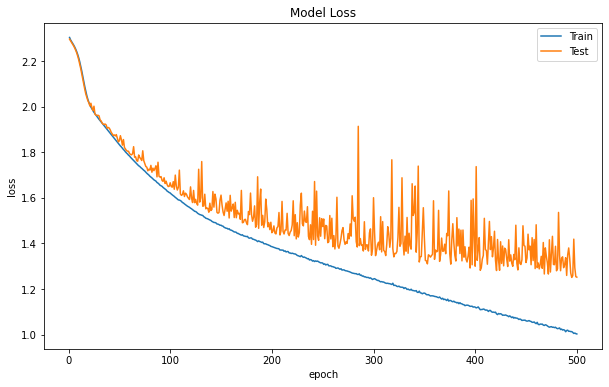

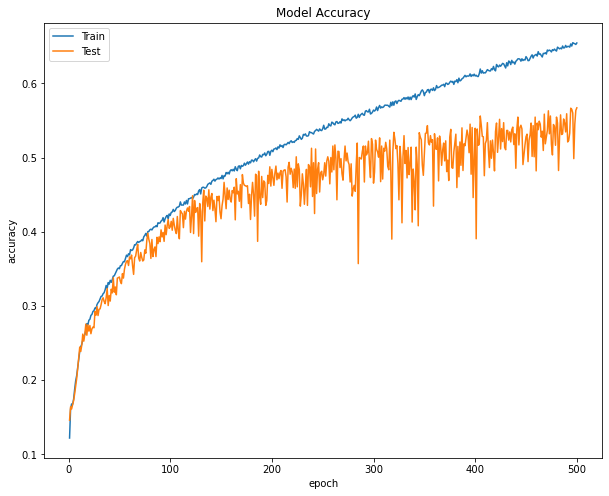

Epoch 1/500
79/79 [==============================] - 2s 15ms/step - loss: 2.4915 - accuracy: 0.1402 - val_loss: 2.1313 - val_accuracy: 0.2110
Epoch 2/500
79/79 [==============================] - 1s 13ms/step - loss: 2.0893 - accuracy: 0.2402 - val_loss: 1.8384 - val_accuracy: 0.3415
Epoch 3/500
79/79 [==============================] - 1s 13ms/step - loss: 1.8600 - accuracy: 0.3381 - val_loss: 1.7965 - val_accuracy: 0.3635
Epoch 4/500
79/79 [==============================] - 1s 13ms/step - loss: 1.6964 - accuracy: 0.3989 - val_loss: 2.1436 - val_accuracy: 0.3050
Epoch 5/500
79/79 [==============================] - 1s 12ms/step - loss: 1.6034 - accuracy: 0.4253 - val_loss: 1.5699 - val_accuracy: 0.4335
Epoch 6/500
79/79 [==============================] - 1s 13ms/step - loss: 1.5131 - accuracy: 0.4619 - val_loss: 1.5422 - val_accuracy: 0.4445
Epoch 7/500
79/79 [==============================] - 1s 13ms/step - loss: 1.4096 - accuracy: 0.4980 - val_loss: 1.7021 - val_accuracy: 0.4140
Epoch 

79/79 [==============================] - 1s 13ms/step - loss: 0.1437 - accuracy: 0.9569 - val_loss: 4.5834 - val_accuracy: 0.5035
Epoch 59/500
79/79 [==============================] - 1s 13ms/step - loss: 0.1014 - accuracy: 0.9681 - val_loss: 5.1742 - val_accuracy: 0.4990
Epoch 60/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0916 - accuracy: 0.9694 - val_loss: 4.9244 - val_accuracy: 0.5060
Epoch 61/500
79/79 [==============================] - 1s 13ms/step - loss: 0.1178 - accuracy: 0.9635 - val_loss: 5.0488 - val_accuracy: 0.5185
Epoch 62/500
79/79 [==============================] - 1s 13ms/step - loss: 0.1227 - accuracy: 0.9612 - val_loss: 5.2159 - val_accuracy: 0.5060
Epoch 63/500
79/79 [==============================] - 1s 13ms/step - loss: 0.1118 - accuracy: 0.9607 - val_loss: 5.3332 - val_accuracy: 0.4695
Epoch 64/500
79/79 [==============================] - 1s 13ms/step - loss: 0.1267 - accuracy: 0.9580 - val_loss: 5.1780 - val_accuracy: 0.5130
Epoch 65/500

79/79 [==============================] - 1s 13ms/step - loss: 0.1453 - accuracy: 0.9714 - val_loss: 8.0065 - val_accuracy: 0.4790
Epoch 116/500
79/79 [==============================] - 1s 13ms/step - loss: 0.1066 - accuracy: 0.9743 - val_loss: 6.9589 - val_accuracy: 0.5190
Epoch 117/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0641 - accuracy: 0.9812 - val_loss: 7.0945 - val_accuracy: 0.5115
Epoch 118/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0591 - accuracy: 0.9809 - val_loss: 6.9506 - val_accuracy: 0.5215
Epoch 119/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0554 - accuracy: 0.9860 - val_loss: 7.3495 - val_accuracy: 0.5130
Epoch 120/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0586 - accuracy: 0.9830 - val_loss: 7.5217 - val_accuracy: 0.5010
Epoch 121/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0583 - accuracy: 0.9815 - val_loss: 7.1528 - val_accuracy: 0.5150
Epoch 

Epoch 172/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0471 - accuracy: 0.9883 - val_loss: 8.1680 - val_accuracy: 0.5205
Epoch 173/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0385 - accuracy: 0.9881 - val_loss: 8.7077 - val_accuracy: 0.5135
Epoch 174/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0386 - accuracy: 0.9894 - val_loss: 8.3990 - val_accuracy: 0.5140
Epoch 175/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0616 - accuracy: 0.9875 - val_loss: 8.5147 - val_accuracy: 0.5140
Epoch 176/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0333 - accuracy: 0.9900 - val_loss: 8.6144 - val_accuracy: 0.5000
Epoch 177/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0533 - accuracy: 0.9859 - val_loss: 8.5389 - val_accuracy: 0.5145
Epoch 178/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0284 - accuracy: 0.9918 - val_loss: 8.3557 - val_accuracy:

Epoch 229/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0396 - accuracy: 0.9897 - val_loss: 9.7028 - val_accuracy: 0.5115
Epoch 230/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0353 - accuracy: 0.9915 - val_loss: 9.7957 - val_accuracy: 0.5015
Epoch 231/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0439 - accuracy: 0.9891 - val_loss: 9.6411 - val_accuracy: 0.5100
Epoch 232/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0393 - accuracy: 0.9892 - val_loss: 9.9201 - val_accuracy: 0.5010
Epoch 233/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0297 - accuracy: 0.9920 - val_loss: 9.9923 - val_accuracy: 0.5060
Epoch 234/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0415 - accuracy: 0.9886 - val_loss: 9.9247 - val_accuracy: 0.5235
Epoch 235/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0403 - accuracy: 0.9892 - val_loss: 10.5745 - val_accuracy

79/79 [==============================] - 1s 14ms/step - loss: 0.0322 - accuracy: 0.9913 - val_loss: 10.7453 - val_accuracy: 0.5180
Epoch 286/500
79/79 [==============================] - 1s 15ms/step - loss: 0.0370 - accuracy: 0.9908 - val_loss: 10.9154 - val_accuracy: 0.5170
Epoch 287/500
79/79 [==============================] - 1s 14ms/step - loss: 0.0502 - accuracy: 0.9891 - val_loss: 11.1645 - val_accuracy: 0.5020
Epoch 288/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0280 - accuracy: 0.9931 - val_loss: 10.8395 - val_accuracy: 0.5215
Epoch 289/500
79/79 [==============================] - 1s 16ms/step - loss: 0.0297 - accuracy: 0.9939 - val_loss: 11.1004 - val_accuracy: 0.5135
Epoch 290/500
79/79 [==============================] - 1s 15ms/step - loss: 0.0391 - accuracy: 0.9900 - val_loss: 10.6415 - val_accuracy: 0.5060
Epoch 291/500
79/79 [==============================] - 1s 14ms/step - loss: 0.0299 - accuracy: 0.9928 - val_loss: 11.0153 - val_accuracy: 0.5150

79/79 [==============================] - 1s 13ms/step - loss: 0.0252 - accuracy: 0.9934 - val_loss: 11.9606 - val_accuracy: 0.5150
Epoch 342/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0307 - accuracy: 0.9931 - val_loss: 12.4277 - val_accuracy: 0.5005
Epoch 343/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0324 - accuracy: 0.9922 - val_loss: 12.0760 - val_accuracy: 0.5055
Epoch 344/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0647 - accuracy: 0.9901 - val_loss: 11.9308 - val_accuracy: 0.5175
Epoch 345/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0283 - accuracy: 0.9928 - val_loss: 12.3467 - val_accuracy: 0.5100
Epoch 346/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0291 - accuracy: 0.9921 - val_loss: 12.6583 - val_accuracy: 0.5155
Epoch 347/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0471 - accuracy: 0.9908 - val_loss: 12.4249 - val_accuracy: 0.5190

79/79 [==============================] - 1s 13ms/step - loss: 0.0239 - accuracy: 0.9937 - val_loss: 14.3655 - val_accuracy: 0.5115
Epoch 398/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0602 - accuracy: 0.9885 - val_loss: 13.5503 - val_accuracy: 0.5280
Epoch 399/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0296 - accuracy: 0.9930 - val_loss: 14.2065 - val_accuracy: 0.5180
Epoch 400/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0365 - accuracy: 0.9934 - val_loss: 14.2844 - val_accuracy: 0.5030
Epoch 401/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0447 - accuracy: 0.9920 - val_loss: 14.0757 - val_accuracy: 0.5120
Epoch 402/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0272 - accuracy: 0.9931 - val_loss: 13.2354 - val_accuracy: 0.5260
Epoch 403/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0403 - accuracy: 0.9921 - val_loss: 14.1919 - val_accuracy: 0.4935

79/79 [==============================] - 1s 13ms/step - loss: 0.0288 - accuracy: 0.9940 - val_loss: 15.8565 - val_accuracy: 0.5295
Epoch 454/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0352 - accuracy: 0.9928 - val_loss: 15.1233 - val_accuracy: 0.5220
Epoch 455/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0487 - accuracy: 0.9921 - val_loss: 15.8543 - val_accuracy: 0.5330
Epoch 456/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0690 - accuracy: 0.9911 - val_loss: 15.4846 - val_accuracy: 0.5270
Epoch 457/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0365 - accuracy: 0.9931 - val_loss: 15.6173 - val_accuracy: 0.5180
Epoch 458/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0386 - accuracy: 0.9933 - val_loss: 15.8214 - val_accuracy: 0.5230
Epoch 459/500
79/79 [==============================] - 1s 13ms/step - loss: 0.0345 - accuracy: 0.9934 - val_loss: 15.9064 - val_accuracy: 0.5205

C:\Users\Yuhan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:2342: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
C:\Users\Yuhan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:1395: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


INFO:tensorflow:Assets written to: ./models/QuestionA2_70_60_RMSProp_no_dropout\assets


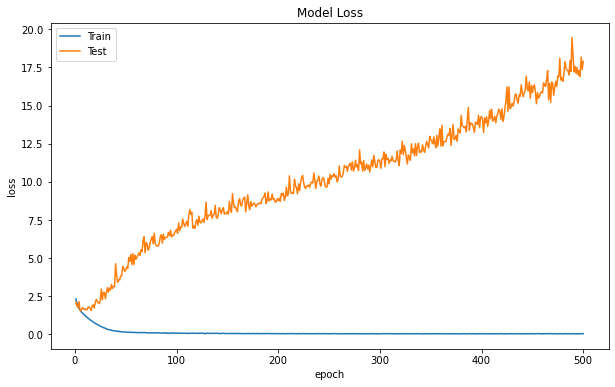

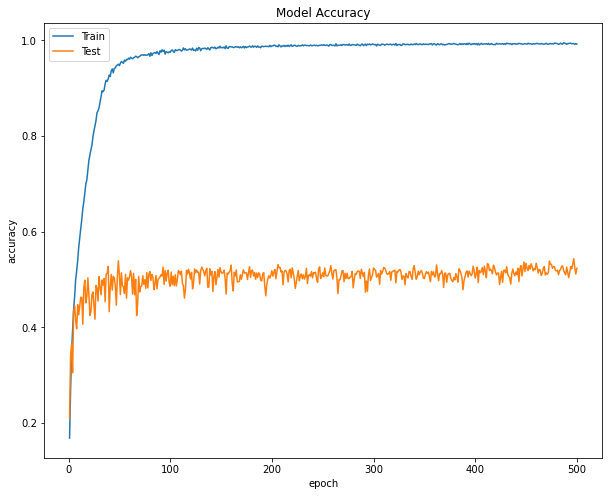

Epoch 1/500
79/79 [==============================] - 1s 14ms/step - loss: 2.1200 - accuracy: 0.2049 - val_loss: 1.8812 - val_accuracy: 0.3025
Epoch 2/500
79/79 [==============================] - 1s 12ms/step - loss: 1.7557 - accuracy: 0.3573 - val_loss: 1.7056 - val_accuracy: 0.3875
Epoch 3/500
79/79 [==============================] - 1s 11ms/step - loss: 1.5892 - accuracy: 0.4259 - val_loss: 1.5217 - val_accuracy: 0.4605
Epoch 4/500
79/79 [==============================] - 1s 12ms/step - loss: 1.4978 - accuracy: 0.4656 - val_loss: 1.5987 - val_accuracy: 0.4100
Epoch 5/500
79/79 [==============================] - 1s 11ms/step - loss: 1.4558 - accuracy: 0.4714 - val_loss: 1.4537 - val_accuracy: 0.4715
Epoch 6/500
79/79 [==============================] - 1s 12ms/step - loss: 1.3804 - accuracy: 0.5026 - val_loss: 1.4453 - val_accuracy: 0.4750
Epoch 7/500
79/79 [==============================] - 1s 11ms/step - loss: 1.3392 - accuracy: 0.5214 - val_loss: 1.3930 - val_accuracy: 0.4950
Epoch 

79/79 [==============================] - 1s 11ms/step - loss: 0.1624 - accuracy: 0.9414 - val_loss: 4.3339 - val_accuracy: 0.4795
Epoch 59/500
79/79 [==============================] - 1s 11ms/step - loss: 0.1938 - accuracy: 0.9316 - val_loss: 4.3665 - val_accuracy: 0.4730
Epoch 60/500
79/79 [==============================] - 1s 11ms/step - loss: 0.2076 - accuracy: 0.9277 - val_loss: 4.5116 - val_accuracy: 0.4920
Epoch 61/500
79/79 [==============================] - 1s 11ms/step - loss: 0.1557 - accuracy: 0.9462 - val_loss: 4.5778 - val_accuracy: 0.4910
Epoch 62/500
79/79 [==============================] - 1s 12ms/step - loss: 0.1498 - accuracy: 0.9435 - val_loss: 4.5236 - val_accuracy: 0.4870
Epoch 63/500
79/79 [==============================] - 1s 11ms/step - loss: 0.1285 - accuracy: 0.9560 - val_loss: 4.5923 - val_accuracy: 0.4710
Epoch 64/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0902 - accuracy: 0.9726 - val_loss: 5.1300 - val_accuracy: 0.4660
Epoch 65/500

79/79 [==============================] - 1s 11ms/step - loss: 9.8969e-04 - accuracy: 1.0000 - val_loss: 6.7348 - val_accuracy: 0.4960
Epoch 116/500
79/79 [==============================] - 1s 11ms/step - loss: 8.8665e-04 - accuracy: 1.0000 - val_loss: 6.7829 - val_accuracy: 0.4960
Epoch 117/500
79/79 [==============================] - 1s 11ms/step - loss: 9.2406e-04 - accuracy: 1.0000 - val_loss: 6.8151 - val_accuracy: 0.4965
Epoch 118/500
79/79 [==============================] - 1s 11ms/step - loss: 8.0397e-04 - accuracy: 1.0000 - val_loss: 6.8550 - val_accuracy: 0.4940
Epoch 119/500
79/79 [==============================] - 1s 12ms/step - loss: 7.3501e-04 - accuracy: 1.0000 - val_loss: 6.8859 - val_accuracy: 0.4955
Epoch 120/500
79/79 [==============================] - 1s 12ms/step - loss: 7.4631e-04 - accuracy: 1.0000 - val_loss: 6.9130 - val_accuracy: 0.4940
Epoch 121/500
79/79 [==============================] - 1s 11ms/step - loss: 6.6340e-04 - accuracy: 1.0000 - val_loss: 6.9442 -

79/79 [==============================] - 1s 11ms/step - loss: 6.5238e-05 - accuracy: 1.0000 - val_loss: 8.6081 - val_accuracy: 0.4970
Epoch 171/500
79/79 [==============================] - 1s 11ms/step - loss: 6.0948e-05 - accuracy: 1.0000 - val_loss: 8.6494 - val_accuracy: 0.4940
Epoch 172/500
79/79 [==============================] - 1s 12ms/step - loss: 5.7838e-05 - accuracy: 1.0000 - val_loss: 8.6795 - val_accuracy: 0.4965
Epoch 173/500
79/79 [==============================] - 1s 12ms/step - loss: 5.8459e-05 - accuracy: 1.0000 - val_loss: 8.7205 - val_accuracy: 0.4955
Epoch 174/500
79/79 [==============================] - 1s 12ms/step - loss: 5.3470e-05 - accuracy: 1.0000 - val_loss: 8.7523 - val_accuracy: 0.4950
Epoch 175/500
79/79 [==============================] - 1s 12ms/step - loss: 5.2602e-05 - accuracy: 1.0000 - val_loss: 8.7689 - val_accuracy: 0.4945
Epoch 176/500
79/79 [==============================] - 1s 11ms/step - loss: 4.8424e-05 - accuracy: 1.0000 - val_loss: 8.8012 -

79/79 [==============================] - 1s 11ms/step - loss: 5.5593e-06 - accuracy: 1.0000 - val_loss: 10.4143 - val_accuracy: 0.4945
Epoch 226/500
79/79 [==============================] - 1s 11ms/step - loss: 5.2416e-06 - accuracy: 1.0000 - val_loss: 10.4546 - val_accuracy: 0.4935
Epoch 227/500
79/79 [==============================] - 1s 12ms/step - loss: 4.8076e-06 - accuracy: 1.0000 - val_loss: 10.4722 - val_accuracy: 0.4915
Epoch 228/500
79/79 [==============================] - 1s 11ms/step - loss: 4.7313e-06 - accuracy: 1.0000 - val_loss: 10.5391 - val_accuracy: 0.4930
Epoch 229/500
79/79 [==============================] - 1s 11ms/step - loss: 4.5075e-06 - accuracy: 1.0000 - val_loss: 10.5415 - val_accuracy: 0.4945
Epoch 230/500
79/79 [==============================] - 1s 11ms/step - loss: 4.3221e-06 - accuracy: 1.0000 - val_loss: 10.5877 - val_accuracy: 0.4930
Epoch 231/500
79/79 [==============================] - 1s 12ms/step - loss: 4.0419e-06 - accuracy: 1.0000 - val_loss: 10

79/79 [==============================] - 1s 12ms/step - loss: 4.6689e-07 - accuracy: 1.0000 - val_loss: 12.1341 - val_accuracy: 0.4940
Epoch 281/500
79/79 [==============================] - 1s 11ms/step - loss: 4.5539e-07 - accuracy: 1.0000 - val_loss: 12.1739 - val_accuracy: 0.4955
Epoch 282/500
79/79 [==============================] - 1s 11ms/step - loss: 4.3527e-07 - accuracy: 1.0000 - val_loss: 12.2081 - val_accuracy: 0.4945
Epoch 283/500
79/79 [==============================] - 1s 11ms/step - loss: 4.2568e-07 - accuracy: 1.0000 - val_loss: 12.2329 - val_accuracy: 0.4950
Epoch 284/500
79/79 [==============================] - 1s 11ms/step - loss: 3.9624e-07 - accuracy: 1.0000 - val_loss: 12.2693 - val_accuracy: 0.4965
Epoch 285/500
79/79 [==============================] - 1s 12ms/step - loss: 3.9417e-07 - accuracy: 1.0000 - val_loss: 12.3047 - val_accuracy: 0.4935
Epoch 286/500
79/79 [==============================] - 1s 11ms/step - loss: 3.7293e-07 - accuracy: 1.0000 - val_loss: 12

79/79 [==============================] - 1s 11ms/step - loss: 5.2975e-08 - accuracy: 1.0000 - val_loss: 13.6024 - val_accuracy: 0.4945
Epoch 336/500
79/79 [==============================] - 1s 11ms/step - loss: 4.9947e-08 - accuracy: 1.0000 - val_loss: 13.6193 - val_accuracy: 0.4930
Epoch 337/500
79/79 [==============================] - 1s 11ms/step - loss: 4.9571e-08 - accuracy: 1.0000 - val_loss: 13.6382 - val_accuracy: 0.4955
Epoch 338/500
79/79 [==============================] - 1s 12ms/step - loss: 4.5048e-08 - accuracy: 1.0000 - val_loss: 13.6575 - val_accuracy: 0.4945
Epoch 339/500
79/79 [==============================] - 1s 12ms/step - loss: 4.7002e-08 - accuracy: 1.0000 - val_loss: 13.6861 - val_accuracy: 0.4935
Epoch 340/500
79/79 [==============================] - 1s 12ms/step - loss: 4.3388e-08 - accuracy: 1.0000 - val_loss: 13.6832 - val_accuracy: 0.4945
Epoch 341/500
79/79 [==============================] - 1s 12ms/step - loss: 4.0969e-08 - accuracy: 1.0000 - val_loss: 13

Epoch 390/500
79/79 [==============================] - 1s 11ms/step - loss: 1.5439e-08 - accuracy: 1.0000 - val_loss: 13.9539 - val_accuracy: 0.4910
Epoch 391/500
79/79 [==============================] - 1s 11ms/step - loss: 1.3935e-08 - accuracy: 1.0000 - val_loss: 13.8965 - val_accuracy: 0.4935
Epoch 392/500
79/79 [==============================] - 1s 12ms/step - loss: 1.3707e-08 - accuracy: 1.0000 - val_loss: 13.9175 - val_accuracy: 0.4945
Epoch 393/500
79/79 [==============================] - 1s 11ms/step - loss: 1.4768e-08 - accuracy: 1.0000 - val_loss: 13.9405 - val_accuracy: 0.4905
Epoch 394/500
79/79 [==============================] - 1s 12ms/step - loss: 1.5515e-08 - accuracy: 1.0000 - val_loss: 13.9236 - val_accuracy: 0.4935
Epoch 395/500
79/79 [==============================] - 1s 12ms/step - loss: 1.3013e-08 - accuracy: 1.0000 - val_loss: 13.9571 - val_accuracy: 0.4885
Epoch 396/500
79/79 [==============================] - 1s 11ms/step - loss: 1.2091e-08 - accuracy: 1.0000 

79/79 [==============================] - 1s 11ms/step - loss: 0.0176 - accuracy: 0.9977 - val_loss: 5.8323 - val_accuracy: 0.4950
Epoch 447/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0133 - accuracy: 0.9987 - val_loss: 5.9274 - val_accuracy: 0.4915
Epoch 448/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0097 - accuracy: 0.9990 - val_loss: 6.0084 - val_accuracy: 0.4955
Epoch 449/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0068 - accuracy: 0.9999 - val_loss: 6.0819 - val_accuracy: 0.4945
Epoch 450/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0059 - accuracy: 0.9998 - val_loss: 6.2321 - val_accuracy: 0.4945
Epoch 451/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 6.2816 - val_accuracy: 0.4970
Epoch 452/500
79/79 [==============================] - 1s 11ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 6.3465 - val_accuracy: 0.4915
Epoch 

C:\Users\Yuhan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:2342: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '
C:\Users\Yuhan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:1395: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


INFO:tensorflow:Assets written to: ./models/QuestionA2_70_60_Adam_no_dropout\assets


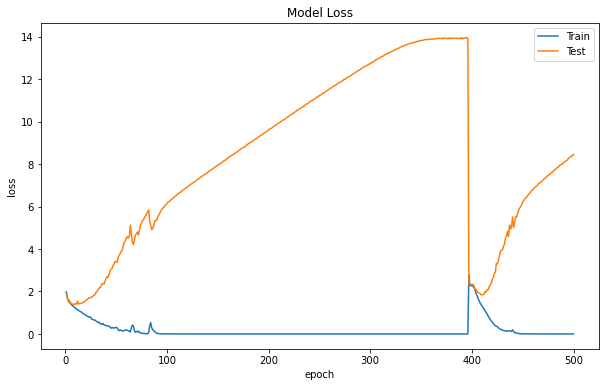

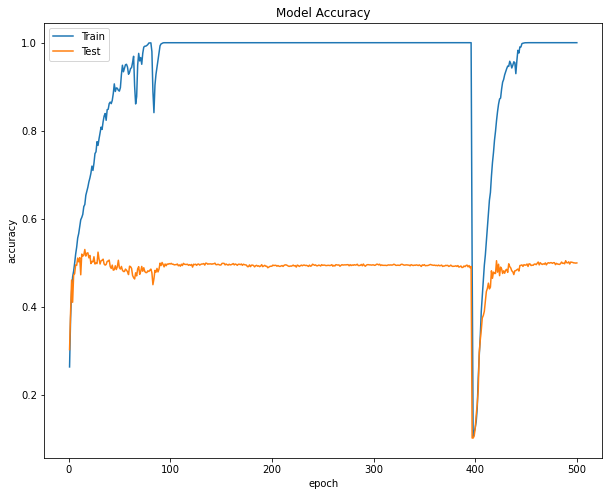

In [10]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

# Optimal Combination of Channels
num_ch_c1 = 70  # Question 2
num_ch_c2 = 60  # Question 2+

optimizer_list = ['SGD','SGD-momentum','RMSProp','Adam']

epochs = 500  # Fixed
batch_size = 128  # Fixed
learning_rate = 0.001
#optimizer_ = 'SGD'  # Question 3
use_dropout = False  # Question 3(d) (see make_model)

x_train, y_train = load_data('data_batch_1')
x_test, y_test = load_data('test_batch_trim')

loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

for optimizer_ in optimizer_list:
    # Initialize optimizer
    optimizer = create_opt(optimizer_,learning_rate)
    # Initialize model
    model = make_model(num_ch_c1, num_ch_c2, use_dropout)

    # Training
    model.compile(optimizer=optimizer, loss=loss, metrics='accuracy')
    history = model.fit(
        x_train,
        y_train,
        batch_size=batch_size,
        epochs=epochs,
        validation_data=(x_test, y_test))

    save_model(num_ch_c1,num_ch_c2,optimizer_,use_dropout)

    # Save the plot for losses
    plot_loss(history.history['loss'],history.history['val_loss'],use_dropout)

    # Save the plot for accuracies
    plot_acc(history.history['accuracy'],history.history['val_accuracy'],use_dropout)

In [11]:
print(x_test[0].shape)
print()

(32, 32, 3)

